In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import f

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [ ]:
bc = pd.read_csv("breast-cancer.csv")

In [ ]:
df = bc.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:

def find_nulls(data:pd.DataFrame) -> pd.DataFrame:
    temp = {'columns':[],'nulls':[],'nulls_%':[],'unique':[]}
    nulls = data.isnull().sum()
    temp['columns'] = nulls.axes[0]
    temp['nulls'] = nulls.values
    temp['nulls_%'] = nulls.values*100/data.shape[0]
    for i in nulls.axes[0]:
        temp['unique'].append(data[i].unique().shape[0])
    temp = pd.DataFrame(temp)
    return temp.sort_values('unique')
find_nulls(bc).style.background_gradient(cmap='Blues')


In [ ]:
px.histogram(data_frame=bc, x='diagnosis', color='diagnosis',color_discrete_sequence=['#547A8E','#4B86B4'])

In [ ]:
px.histogram(data_frame=bc,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#547A8E','lightblue'])

In [ ]:
px.histogram(data_frame=bc,x='radius_mean',color='diagnosis',color_discrete_sequence=['#547A8E','lightblue'])

In [ ]:
px.histogram(data_frame=bc,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#547A8E','lightblue'])

In [ ]:
px.histogram(data_frame=bc,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#547A8E','lightblue'])

In [ ]:
px.histogram(data_frame=bc,x='texture_mean',color='diagnosis',color_discrete_sequence=['#547A8E','lightblue'])

In [ ]:
px.scatter(data_frame=bc,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#547A8E','lightblue'])

In [ ]:
px.scatter(data_frame=bc,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#547A8E','lightblue'])

In [ ]:
px.scatter(data_frame=bc,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#547A8E','lightblue'])

In [ ]:
cols = ['area_mean','perimeter_mean','area_worst','perimeter_worst','perimeter_se','area_se']
def annova(data:pd.DataFrame,cols:list[str],output:str):
    for col in cols:
        SSB,SSW = 0,0
        mean = data[col].mean()
        for i in data[output].unique():
            temp = data[data[output] == i][col]
            SSB += temp.shape[0]*(mean - temp.mean())**2
            SSW += np.sum((temp-temp.mean())**2)
        db = data[output].unique().shape[0] - 1
        dw = data[col].shape[0] - data[output].unique().shape[0]
        critical = (SSB/db) / (SSW/dw)
        if critical < f.ppf(0.95,db,dw):
            print("failed to reject null hypothesis between",col,'and',output)
annova(bc,bc.columns.drop(cols).drop('diagnosis'),'diagnosis')

failed to reject null hypothesis between id and diagnosis
failed to reject null hypothesis between fractal_dimension_mean and diagnosis
failed to reject null hypothesis between texture_se and diagnosis
failed to reject null hypothesis between smoothness_se and diagnosis
failed to reject null hypothesis between symmetry_se and diagnosis
failed to reject null hypothesis between fractal_dimension_se and diagnosis


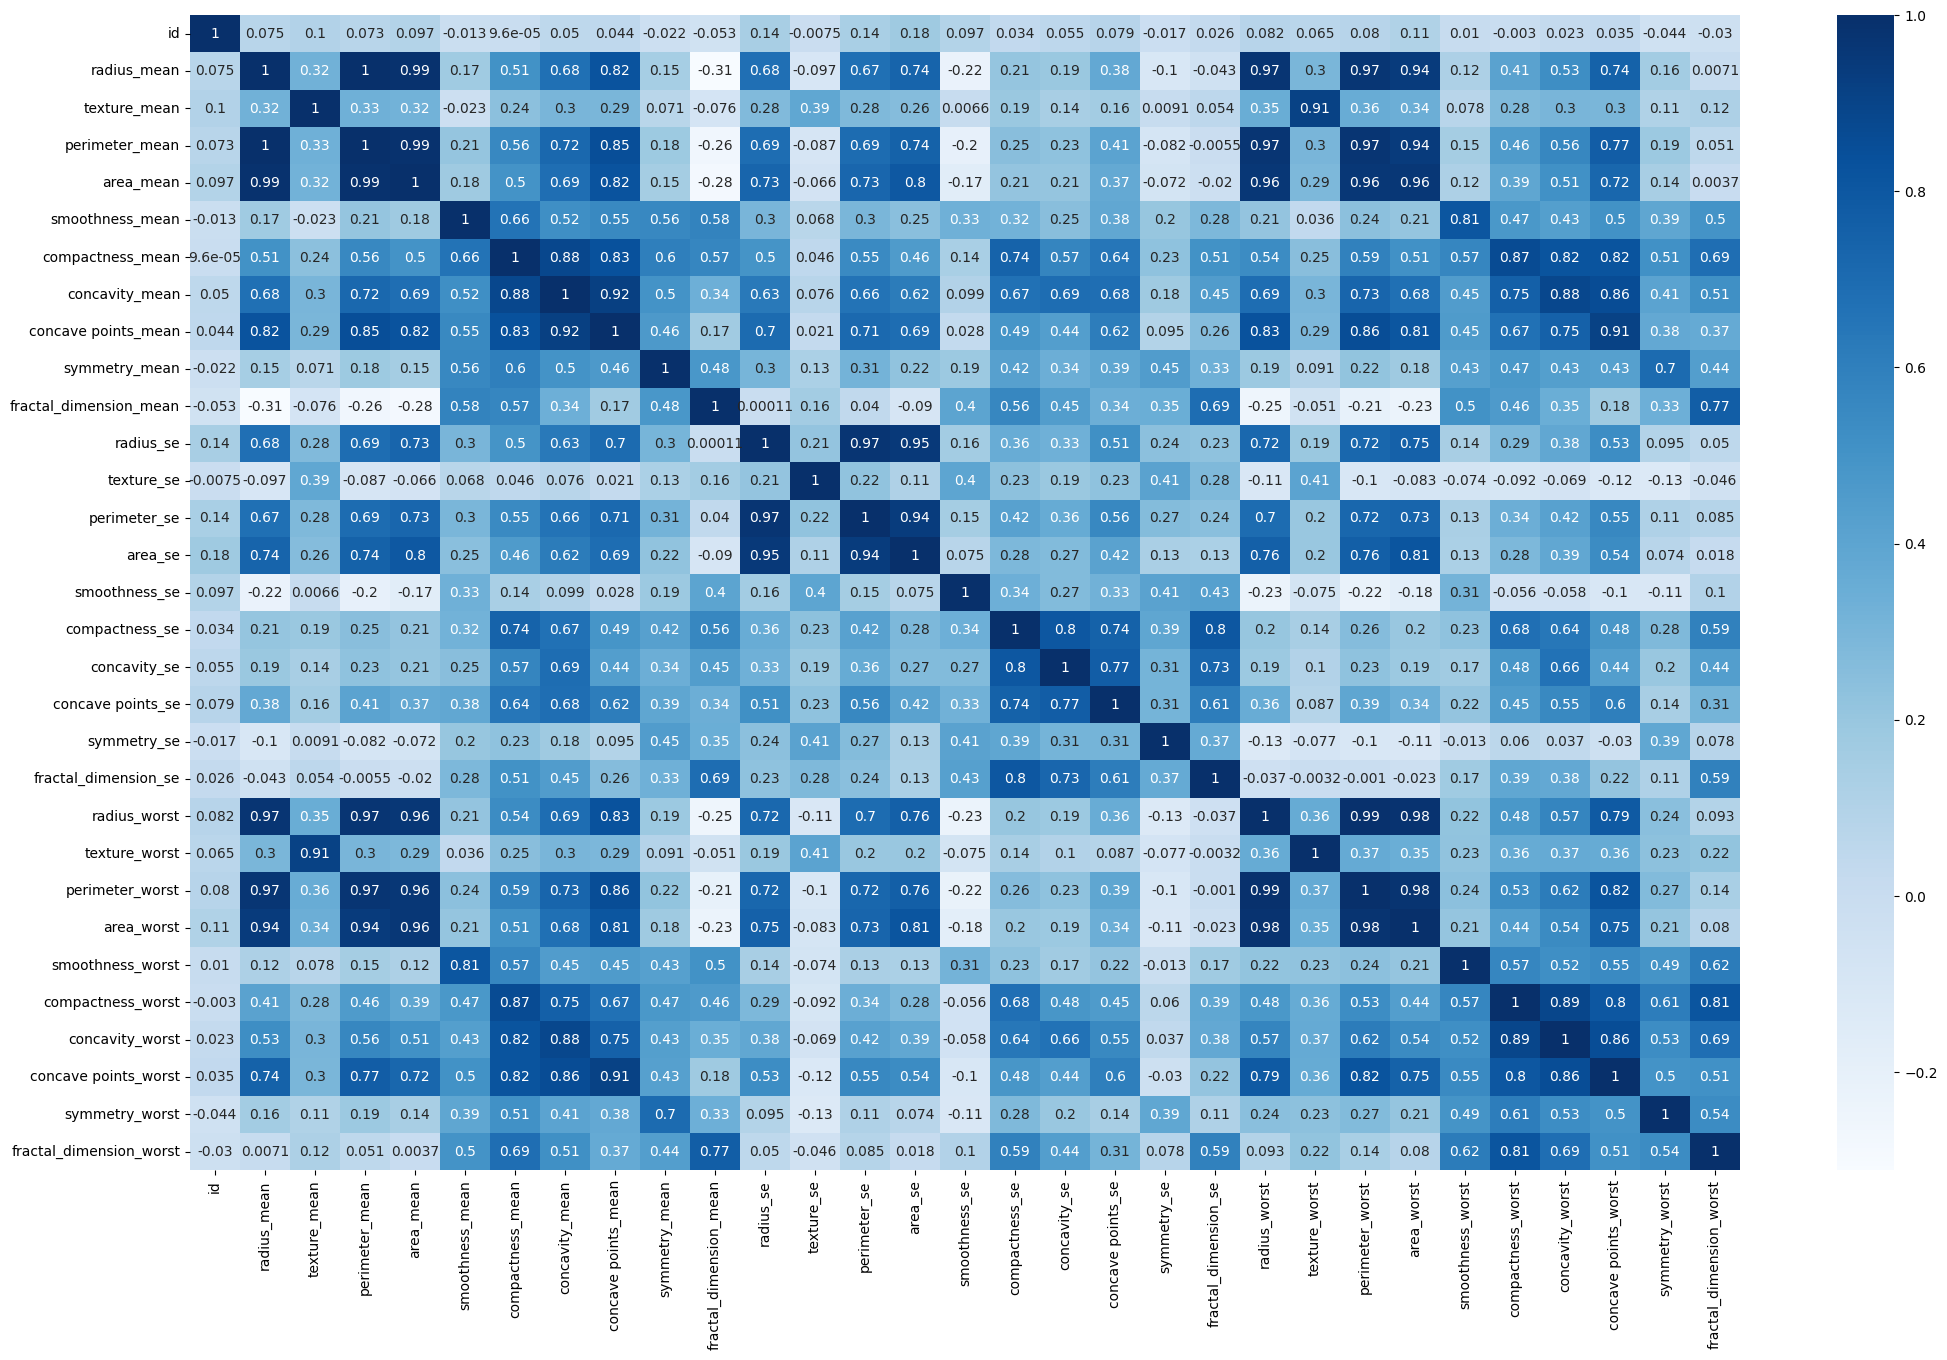

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(bc.drop(columns=['diagnosis']).corr(),annot=True,cmap='Blues')
plt.show()

In [ ]:
sns.pairplot(bc.drop(columns=['diagnosis']), corner = True)

D:\python-learn\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: >

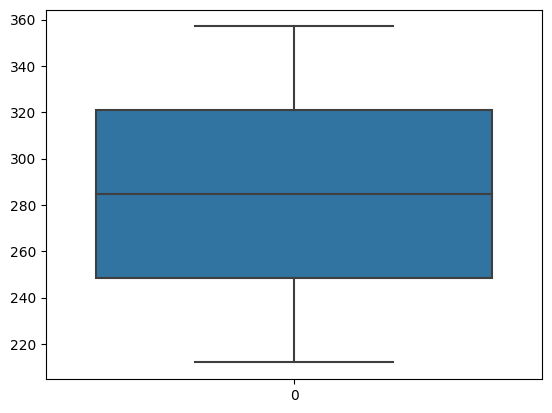

In [ ]:
sns.boxplot(df['diagnosis'].value_counts())

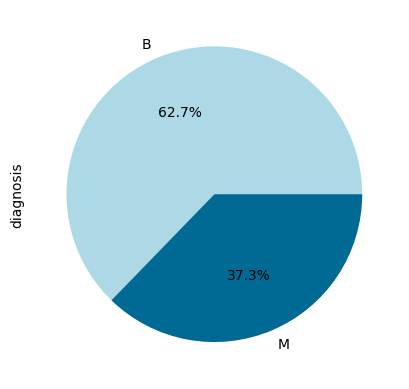

In [ ]:
colors = ['lightblue', '#006994']
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

plt.show()

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
print (df['diagnosis'])

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
X_train,X_test,y_train,y_test = train_test_split(df[df.columns.drop('diagnosis')].to_numpy(),df['diagnosis'].to_numpy(),random_state=42,train_size=0.7)

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data
y_train = pd.Series(y_train)

In [ ]:
print (df['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [ ]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''

    model.fit(X_train, y_train)  #fi t the model instance


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

In [ ]:
print (df['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [ ]:
lg = LogisticRegression(max_iter=3000)

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

In [ ]:
results.index = ['LogisticRegression']

In [ ]:
 y_predictlg = lg.predict(X_test)

 from sklearn import metrics
 cnf_matrixlg = metrics.confusion_matrix(y_test, y_predictlg)
 cnf_matrixlg

array([[106,   2],
       [  2,  61]])

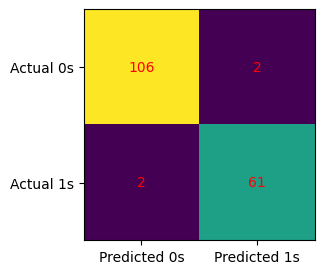

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cnf_matrixlg)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cnf_matrixlg[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = pd.concat([results, decision_tree_results])

In [ ]:
y_predictdt = decision_tree.predict(X_test)

cnf_matrixdt = metrics.confusion_matrix(y_test, y_predictdt)
cnf_matrixdt

array([[99,  9],
       [ 4, 59]])

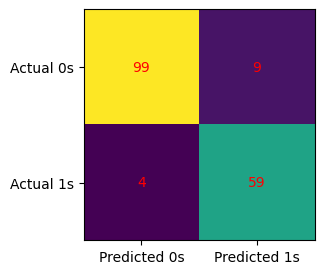

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cnf_matrixdt)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cnf_matrixdt[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(type(results))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = pd.concat([results, rfc_result])

In [ ]:
y_predictrfc = rfc.predict(X_test)

cnf_matrixrfc = metrics.confusion_matrix(y_test, y_predictrfc)
cnf_matrixrfc

array([[106,   2],
       [  3,  60]])

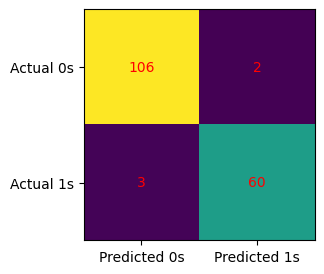

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cnf_matrixrfc)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cnf_matrixrfc[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [ ]:
# Install Shap Package
!pip install shap

In [ ]:
# Import Shap Package
import shap
shap.initjs()

In [ ]:
# Contruct features names for Shap plots
df.drop("diagnosis", axis=1, inplace=True)
X_columns=df.columns.values
print(X_columns)

['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


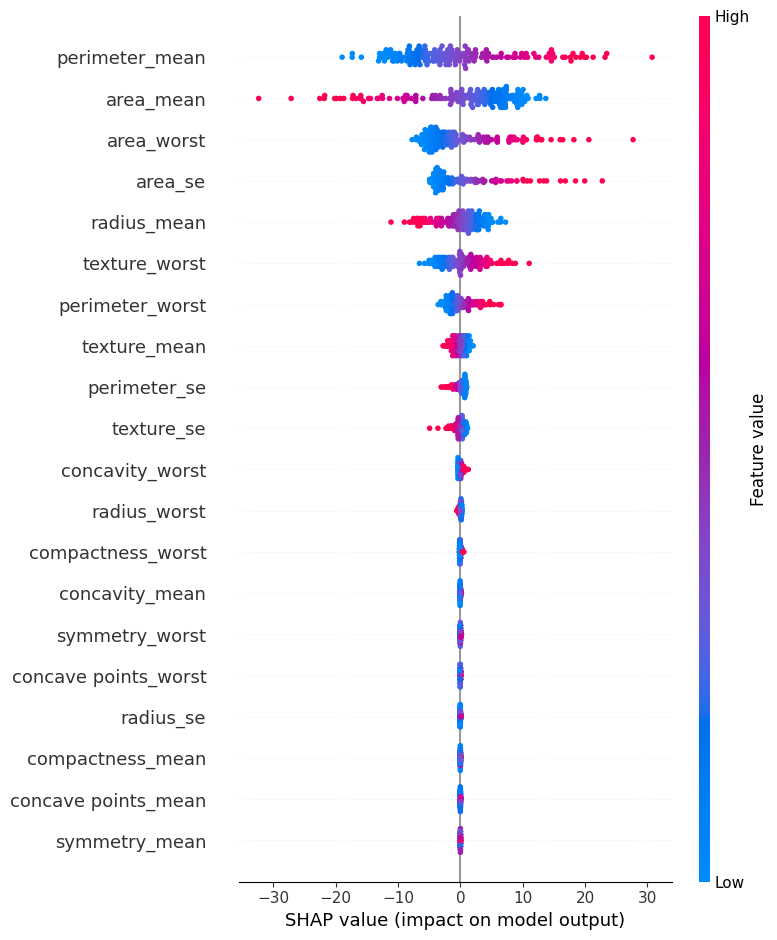

In [ ]:
# Setting up SHAP Explainer
# First, create an explainer object by providing a logistic regression model
# Then calculate SHAP value using the testing set
explainer = shap.LinearExplainer(lg, X_train)
shap_values = explainer.shap_values(X_test)


# Display the beeswax summary_plot using SHAP values and testing set
shap.summary_plot(shap_values, X_test, feature_names=X_columns)

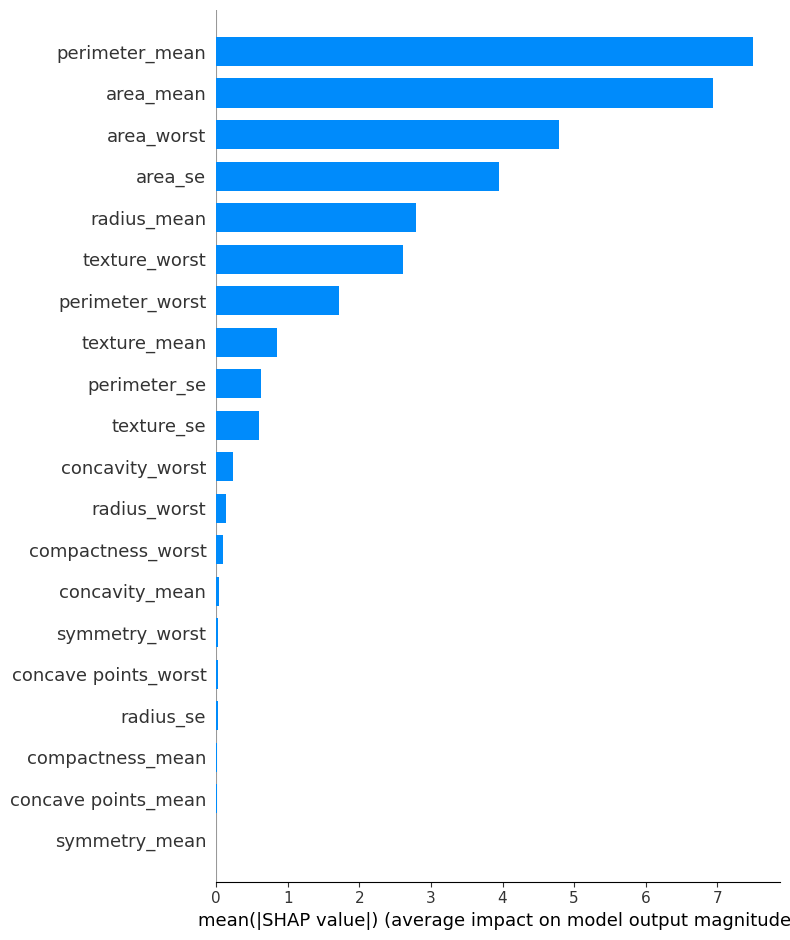

In [ ]:
# Display the bar type summary_plot using average SHAP values and testing set
shap.summary_plot(shap_values, X_test, feature_names=X_columns, plot_type="bar")